In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib

## 2D Plots

Text(0, 0.5, 'y (kpc)')

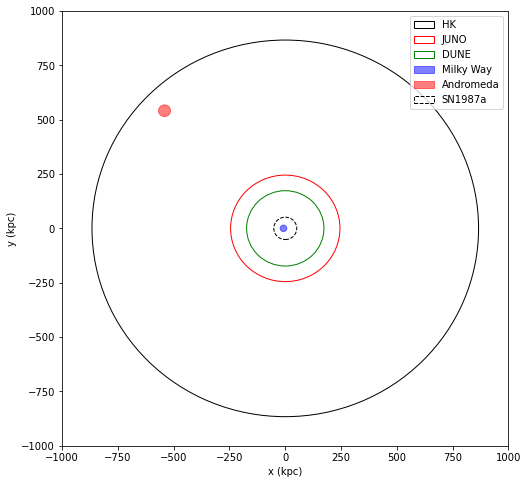

In [2]:
# SN detection with at least 10 events
# Best detectors (future)

events = [75000,6000,3000]
labels = ["HK","JUNO","DUNE"]
colors = ["k","r","g"]

num = 10

fig, ax = plt.subplots()
fig.set_size_inches((8,8))
circles = []
for i in range(len(events)):
    circles.append(plt.Circle((0, 0), 10 * (events[i]/num)**0.5, fill = False, color = colors[i]))
    ax.add_artist(circles[i])


mw = plt.Circle((-8, 0), 15, color = "b", alpha = 0.5)
ax.add_artist(mw)

an = plt.Circle((-765/2**0.5, 765/2**0.5), 27, color = "r", alpha = 0.5)
ax.add_artist(an)

sn = plt.Circle((0, 0), 51.4, fill = False, color = "k", linestyle = "--")
ax.add_artist(sn)

circles = circles + [mw, an, sn]
labels = labels + ["Milky Way", "Andromeda", "SN1987a"]
ax.legend(circles, labels)


plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")

Text(0, 0.5, 'y (kpc)')

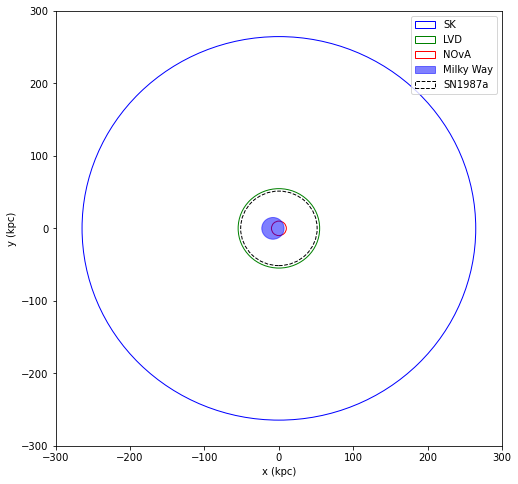

In [3]:
# SN detection with at least 10 events
# Best detectors (current)

events = [7000,300]
labels = ["SK","LVD"]
colors = ["b","g"]

num = 10

fig, ax = plt.subplots()
fig.set_size_inches((8,8))
circles = []
for i in range(len(events)):
    circles.append(plt.Circle((0, 0), 10 * (events[i]/num)**0.5, fill = False, color = colors[i]))
    ax.add_artist(circles[i])

nova = plt.Circle((0, 0), 10, color = "r", fill = False)
ax.add_artist(nova)

mw = plt.Circle((-8, 0), 15, color = "b", alpha = 0.5)
ax.add_artist(mw)

sn = plt.Circle((0, 0), 51.4, fill = False, color = "k", linestyle = "--")
ax.add_artist(sn)

circles = circles + [nova,mw, sn]
labels = labels + ["NOvA","Milky Way", "SN1987a"]
ax.legend(circles, labels)


plt.xlim(-300,300)
plt.ylim(-300,300)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")

## 3D Plots

In [4]:
snr = pd.read_csv("snr.tsv", sep='\t',comment='#')
ra = []
dec = []
dist = snr["Distance"]
for p in snr["Position"]:
    c = SkyCoord(p, unit=(u.hourangle, u.deg))
    ra.append(c.ra.degree)
    dec.append(c.dec.degree)
    
x_snr = np.cos(ra) * np.cos(dec) * dist
y_snr = np.sin(ra) * np.cos(dec) * dist
z_snr = np.sin(dec) * dist

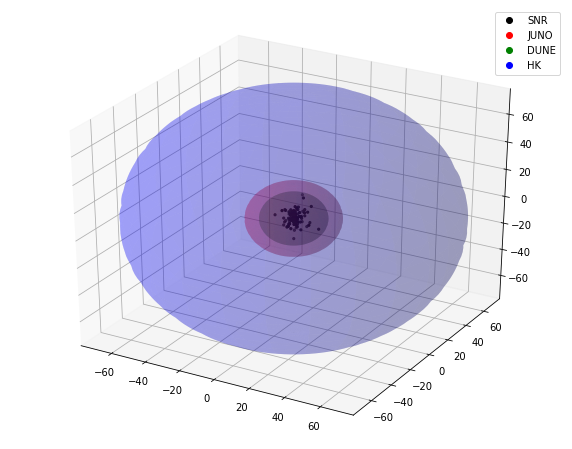

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_snr, y_snr, z_snr, s=5, color="k")
ax.set_xlim(-75, 75)
ax.set_ylim(-75, 75)
ax.set_zlim(-75, 75)

label = ["SNR"]
lines = [matplotlib.lines.Line2D([0],[0], linestyle="none", c='k', marker = 'o')]


events = [6000,3000,75000]
labels = ["JUNO","DUNE","HK"]
colors = ["r","g","b"]
num = 1000
for i in range(len(events)):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 10 * (events[i]/num)**0.5 * np.outer(np.cos(u), np.sin(v))
    y = 10 * (events[i]/num)**0.5 * np.outer(np.sin(u), np.sin(v))
    z = 10 * (events[i]/num)**0.5 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color=colors[i], alpha=0.2)
    line = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[i], marker = 'o')
    label.append(labels[i])
    lines.append(line)
    
ax.legend(lines, label, numpoints = 1)